[0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0]
Jaccard Accuracy score is  0.75
[[ 6  9]
 [ 1 24]]
Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]
              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

   micro avg       0.75      0.75      0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40

LogLoss 1: : 0.60
LogLoss 2: : 0.61


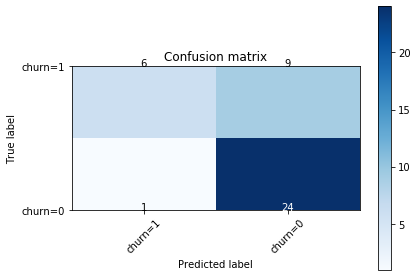

In [43]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

df = pd.read_csv('ChurnData.csv')
df.head(5)

df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
df['churn']=df['churn'].astype('int')
df[0:5]

#x = np.asarray(df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']])
x = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']].to_numpy()
y = df['churn'].to_numpy()

# Standardrize
x = preprocessing.StandardScaler().fit(x).transform(x)

#Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

#Model Creation and Training
from sklearn.linear_model import LogisticRegression
LR_Model = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)

# Predicting of Model
y_predict = LR_Model.predict(x_test)
print(y_predict)
y_predict_proba = LR_Model.predict_proba(x_test)
#print(y_predict_proba)


# Accuracy using Jaccard Score
from sklearn.metrics import jaccard_similarity_score
print('Jaccard Accuracy score is ',jaccard_similarity_score(y_test,y_predict))

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_predict, labels=[1,0]))


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

print (classification_report(y_test, y_predict))

from sklearn.metrics import log_loss
print ("LogLoss 1: : %.2f" % log_loss(y_test, y_predict_proba))

LR2 = LogisticRegression(C=0.01, solver='sag').fit(x_train,y_train)
yhat_prob2 = LR2.predict_proba(x_test)
print ("LogLoss 2: : %.2f" % log_loss(y_test, yhat_prob2))